In [1]:
import pandas as pd
import numpy as np

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [16]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [18]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

Survived      0
Age         177
Fare          0
dtype: int64
Survived    0
Age         0
Fare        0
dtype: int64


In [22]:
df.shape

(714, 3)

In [24]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [26]:
X, y

(      Age     Fare
 0    22.0   7.2500
 1    38.0  71.2833
 2    26.0   7.9250
 3    35.0  53.1000
 4    35.0   8.0500
 ..    ...      ...
 885  39.0  29.1250
 886  27.0  13.0000
 887  19.0  30.0000
 889  26.0  30.0000
 890  32.0   7.7500
 
 [714 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((571, 2), (143, 2), (571,), (143,))

## Without Binning

In [39]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6153846153846154

In [43]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

np.float64(0.6261150234741784)

## With Binning

In [104]:
def discretize(bins, strategy):
    ct = ColumnTransformer(transformers=[
        ('Kbins', KBinsDiscretizer(n_bins=bins, strategy=strategy, encode='ordinal'), [0,1])
    ])
    X_trf = ct.fit_transform(X)

    accuracy = np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y, cv=10, scoring='accuracy'))
    print(accuracy)

    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    sns.histplot(X['Age'], ax=axs[0])
    axs[0].set_title('Age Before Binning')
    
    sns.histplot(X_trf[:, 0], ax=axs[1], color='red')
    axs[1].set_title('Age After Binning')
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    sns.histplot(X['Fare'], ax=axs[0])
    axs[0].set_title('Fare Before Binning')
    
    sns.histplot(X_trf[:, 1], ax=axs[1], color='red')
    axs[1].set_title('Fare After Binning')
    plt.tight_layout()
    plt.show()    

0.682140062597809


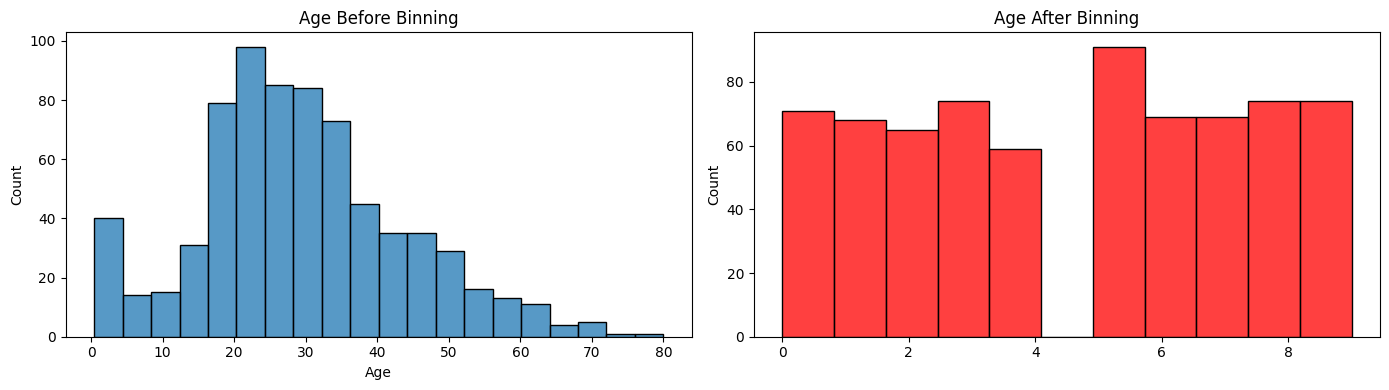

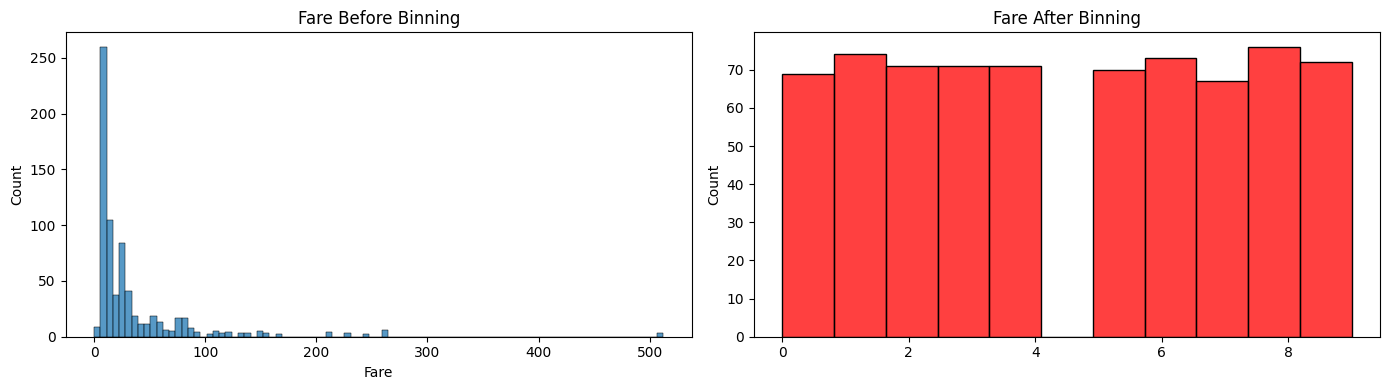

In [128]:
discretize(10, 'quantile')